## 1. Finding corners on image: Harris and FAST

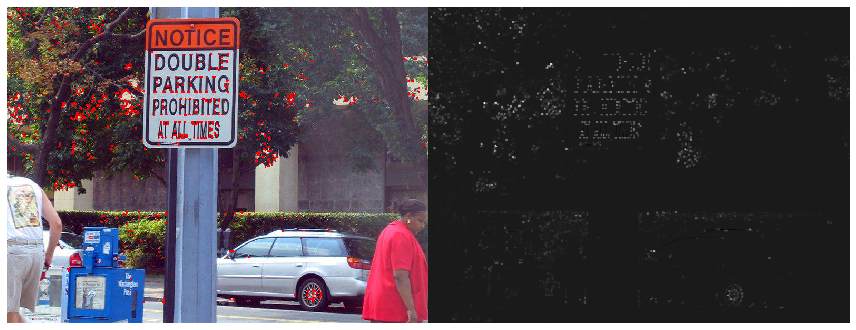

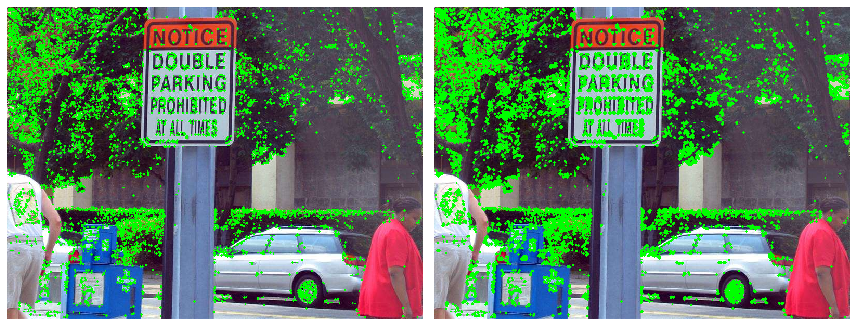

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('./data/scenetext01.jpg', cv2.IMREAD_COLOR)
corners = cv2.cornerHarris(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 2, 3, 0.04)

corners = cv2.dilate(corners, None)

show_img = np.copy(img)
show_img[corners>0.1*corners.max()]=[0,0,255]

corners = cv2.normalize(corners, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
show_img = np.hstack((show_img, cv2.cvtColor(corners, cv2.COLOR_GRAY2BGR)))

cv2.imshow('Harris corner detector', show_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

image = cv2.cvtColor(show_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,12))
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.imshow(image)
plt.show()

# FAST(Features from Accelerated Segment Test) descriptor
fast = cv2.FastFeatureDetector_create(30, True, cv2.FAST_FEATURE_DETECTOR_TYPE_9_16)
kp = fast.detect(img)

show_img = np.copy(img)
for p in cv2.KeyPoint_convert(kp):
    cv2.circle(show_img, tuple(p), 2, (0, 255, 0), cv2.FILLED)

cv2.imshow('FAST corner detector', show_img)
if cv2.waitKey(0) == 27: #ESC
    cv2.destroyAllWindows()

plt.figure(figsize=(12,6))
plt.subplot(121)
image = cv2.cvtColor(show_img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.imshow(image)

fast.setNonmaxSuppression(False)
kp = fast.detect(img)

for p in cv2.KeyPoint_convert(kp):
    cv2.circle(show_img, tuple(p), 2, (0, 255, 0), cv2.FILLED)
    
cv2.imshow('FAST corner detector', show_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.subplot(122)
image = cv2.cvtColor(show_img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.imshow(image)
plt.tight_layout()
plt.show()

## 2. Selecting good corners in image for tracking

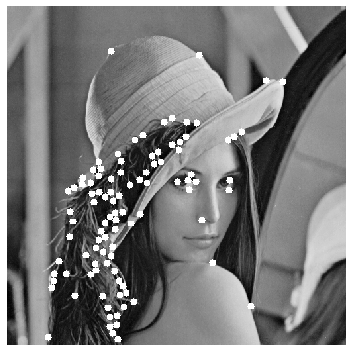

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('./data/Lena.png', cv2.IMREAD_GRAYSCALE)

corners = cv2.goodFeaturesToTrack(img, 100, 0.05, 10)

for c in corners:
    x, y = c[0]
    cv2.circle(img, (x, y), 5, 255, -1)
plt.figure(figsize=(5, 5))
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.imshow(img, cmap='gray')
plt.tight_layout()
plt.show()

## 3. Drawing keypoints, descriptors and matches

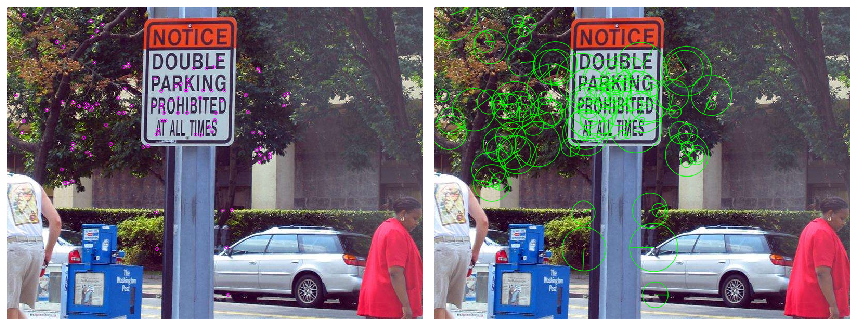

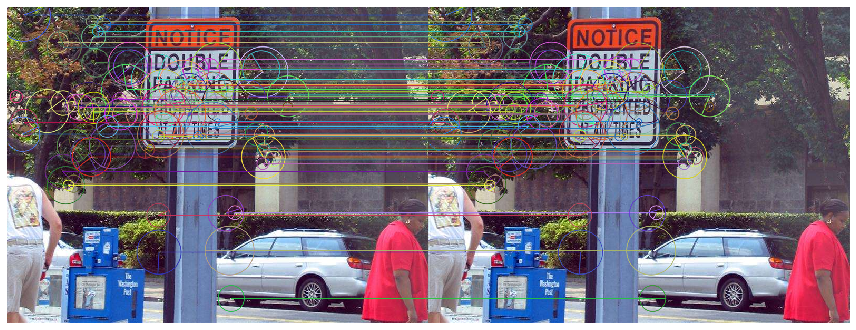

In [3]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('./data/scenetext01.jpg', cv2.IMREAD_COLOR)

# Step1: Get FAST keypoints within the image.
#        Then, insert size and orientation of each keypoint with a random value.
fast = cv2.FastFeatureDetector_create(160, True, cv2.FAST_FEATURE_DETECTOR_TYPE_9_16)
keyPoints = fast.detect(img)

for kp in keyPoints:
    kp.size = 100*random.random()
    kp.angle = 360*random.random()

matches = []
for i in range(len(keyPoints)):
    matches.append(cv2.DMatch(i, i, 1))
    
# Step2: Show keypoint
show_img = cv2.drawKeypoints(img, keyPoints, None, (255, 0, 255))

plt.figure(figsize=(12,6))
plt.subplot(121)
image = cv2.cvtColor(show_img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.imshow(image)

# Step3: Visualize size and orientation information for the keypoints.
show_img = cv2.drawKeypoints(img, keyPoints, None, (0, 255, 0), 
                             cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.subplot(122)
image = cv2.cvtColor(show_img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.imshow(image)
plt.tight_layout()
plt.show()

# Step4: Display a result which matches the keypoints.
show_img = cv2.drawMatches(img, keyPoints, img, keyPoints, matches, None, 
                           flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

image = cv2.cvtColor(show_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,12))
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.imshow(image)
plt.show()

## 4. Detecting scale invariant keypoints

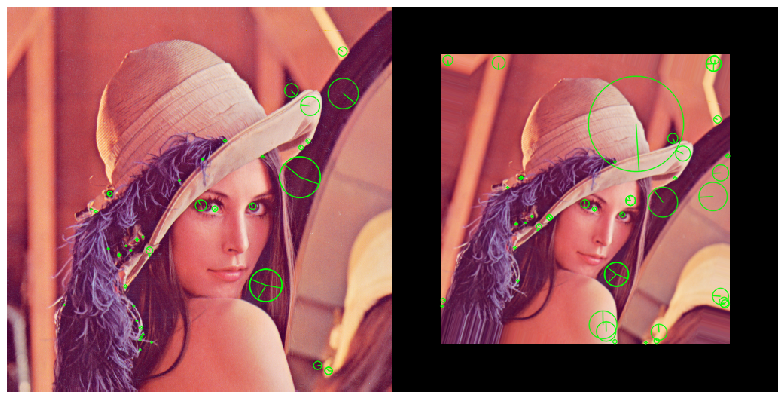

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img0 = cv2.imread('./data/Lena.png', cv2.IMREAD_COLOR)
img1 = cv2.imread('./data/Lena_rotated.png', cv2.IMREAD_COLOR)
img1 = cv2.resize(img1, None, fx=0.75, fy=0.75)
img1 = np.pad(img1, ((64,)*2, (64,)*2, (0,)*2), 'constant', constant_values=0)
imgs_list = [img0, img1]

# SIFT(Scale Invariant Feature Transform) descriptor
detector = cv2.xfeatures2d.SIFT_create(50)

for i in range(len(imgs_list)):
    keypoints, descriptors = detector.detectAndCompute(imgs_list[i], None)
        
    imgs_list[i] = cv2.drawKeypoints(imgs_list[i], keypoints, None, (0, 255, 0),
                                     flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
#cv2.imshow('SIFT keypoints', np.hstack(imgs_list))
#cv2.waitKey()
#cv2.destroyAllWindows()
image = cv2.cvtColor(np.hstack(imgs_list), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(11,11))
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.imshow(image)
plt.show()

## 5. Computing descriptors for image keypoints: SURF, BRIEF, ORB

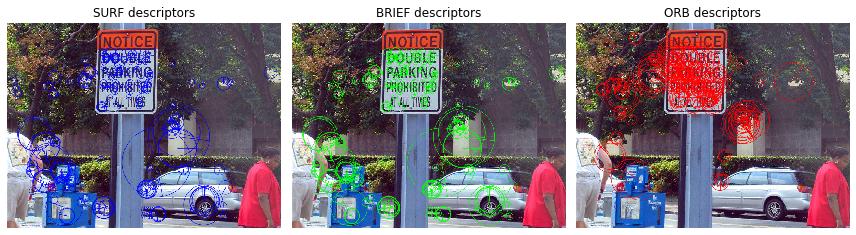

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('./data/scenetext01.jpg', cv2.IMREAD_COLOR)

surf = cv2.xfeatures2d.SURF_create(10000)
surf.setExtended(True)
surf.setNOctaves(3)
surf.setNOctaveLayers(10)
surf.setUpright(False)

keyPoints, descriptors = surf.detectAndCompute(img, None)

show_img = cv2.drawKeypoints(img, keyPoints, None, (255, 0, 0), 
                             cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(12,4))
plt.subplot(131)
image = cv2.cvtColor(show_img, cv2.COLOR_BGR2RGB)
plt.title('SURF descriptors')
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.imshow(image)

brief = cv2.xfeatures2d.BriefDescriptorExtractor_create(32, True)

keyPoints, descriptors = brief.compute(img, keyPoints)

show_img = cv2.drawKeypoints(img, keyPoints, None, (0, 255, 0), 
                             cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.subplot(132)
image = cv2.cvtColor(show_img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.title('BRIEF descriptors')
plt.xticks([]), plt.yticks([])
plt.imshow(image)

orb = cv2.ORB_create()

orb.setMaxFeatures(200)

keyPoints = orb.detect(img, None)
keyPoints, descriptors = orb.compute(img, keyPoints)

show_img = cv2.drawKeypoints(img, keyPoints, None, (0, 0, 255), 
                             cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.subplot(133)
image = cv2.cvtColor(show_img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.title('ORB descriptors')
plt.xticks([]), plt.yticks([])
plt.imshow(image)
plt.tight_layout()
plt.show()

## 6. Matching techinques for finding correspondences between descriptors

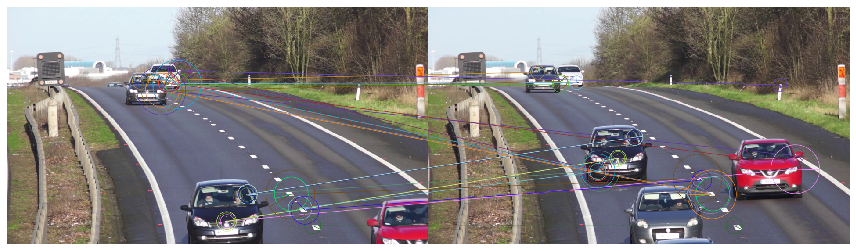

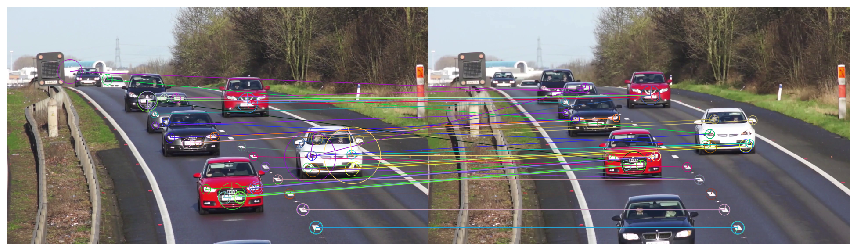

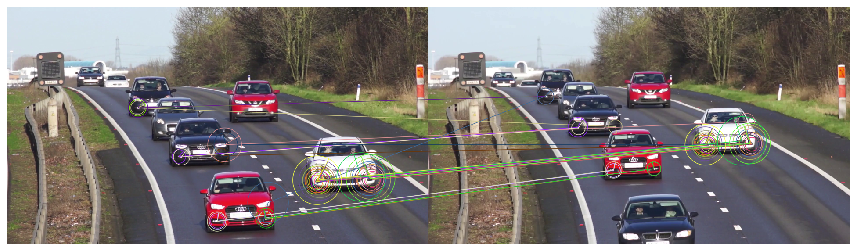

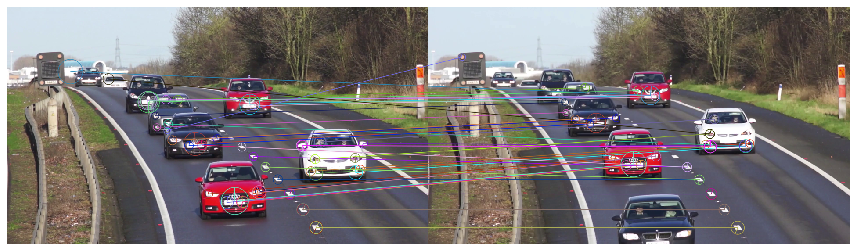

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Step1: Define a function that processes the video.
#        In this function, look for matching keypoints before 40 frame with current frame.
def video_keypoints(matcher, cap=cv2.VideoCapture("./data/traffic.mp4"), 
                    detector=cv2.ORB_create(40)):
    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
    while True:
        status_cap, frame = cap.read()
        frame = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)
        if not status_cap:
            break
        if (cap.get(cv2.CAP_PROP_POS_FRAMES) - 1) % 40 == 0:
            key_frame = np.copy(frame)
            key_points_1, descriptors_1 = detector.detectAndCompute(frame, None)
        else:
            key_points_2, descriptors_2 = detector.detectAndCompute(frame, None)
            matches = matcher.match(descriptors_2, descriptors_1)
            frame = cv2.drawMatches(frame, key_points_2, key_frame, key_points_1, 
                                    matches, None, 
                                    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS | 
                                    cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
        cv2.imshow('Keypoints matching', frame)
        if cv2.waitKey(5) == 27: #Speed, ESC
            break

    cv2.destroyAllWindows()
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12,12))
    plt.axis('off')
    plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.imshow(image)
    plt.show()

# Step2: Perform frame comparison using Brute-Force matching method.
bf_matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING2, True)
video_keypoints(bf_matcher)

# Step3: Apply KD tree indexing to SURF descriptor.
flann_kd_matcher = cv2.FlannBasedMatcher()
video_keypoints(flann_kd_matcher, detector=cv2.xfeatures2d.SURF_create(20000))

# Step4: Use LSH(Local-Sensitive Hash) to extract binary ORB features.
FLANN_INDEX_LSH = 6
index_params = dict(algorithm=FLANN_INDEX_LSH, table_number=20, key_size=15, multi_probe_level=2)
search_params = dict(checks=10)

flann_kd_matcher = cv2.FlannBasedMatcher(index_params, search_params)
video_keypoints(flann_kd_matcher)

# Step5: Retry the process using composite KD tree and k-mean index algorithm.
FLANN_INDEX_COMPOSITE = 3
index_params = dict(algorithm=FLANN_INDEX_COMPOSITE, trees=16)
search_params = dict(checks=10)

flann_kd_matcher = cv2.FlannBasedMatcher(index_params, search_params)
video_keypoints(flann_kd_matcher, detector=cv2.xfeatures2d.SURF_create(20000))

## 7. Finding reliables matches: cross-check and ratio test

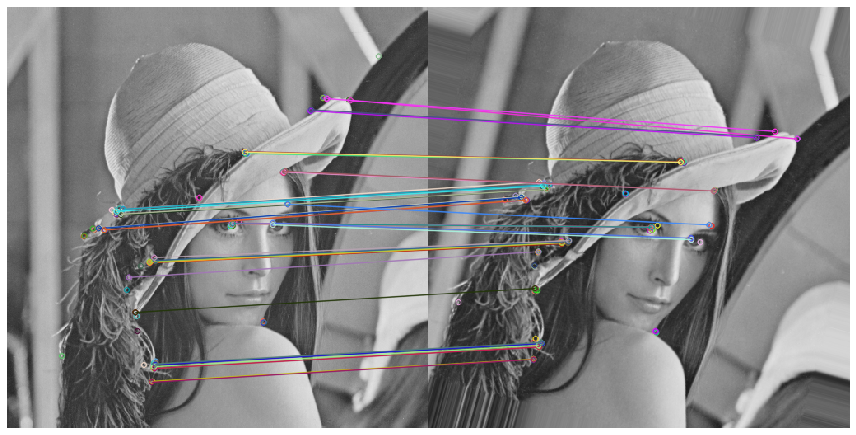

In [7]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Step1: Make a rotated image.
img0 = cv2.imread('./data/Lena.png')
M = np.array([[math.cos(np.pi/12), -math.sin(np.pi/12), 0],
             [math.sin(np.pi/12), math.cos(np.pi/12), 0],
             [0,0,1]])
Moff = np.eye(3)
Moff[0,2] = -img0.shape[1]/2
Moff[1,2] = -img0.shape[0]/2
##print(np.linalg.inv(Moff)@M@Moff)
img1 = cv2.warpPerspective(img0, np.linalg.inv(Moff)@M@Moff, (img0.shape[1], img0.shape[0]), borderMode=cv2.BORDER_REPLICATE)
cv2.imwrite('./data/Lena_rotated.png', img1)

# Step2: Call test images.
img0 = cv2.imread('./data/Lena.png', cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread('./data/Lena_rotated.png', cv2.IMREAD_GRAYSCALE)

# Step3: Build a detector and a descriptor.
detector = cv2.ORB_create(100)
kps0, fea0 = detector.detectAndCompute(img0, None)
kps1, fea1 = detector.detectAndCompute(img1, None)

# Step4: Prepare a regular expression of (k = 2) k-nearest neighborhood descriptor and
#        verify that the expression matches from left to right.
#        And check in the opposite direction.
matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING, False)
matches01 = matcher.knnMatch(fea0, fea1, k=2)
matches10 = matcher.knnMatch(fea1, fea0, k=2)

# Step5: Use ratio test to create a function for filter matching and filter all matches.
def ratio_test(matches, ratio_thr):
    good_matches = []
    for m in matches:
        ratio = m[0].distance / m[1].distance
        if ratio < ratio_thr:
            good_matches.append(m[0])
    return good_matches

RATIO_THR = 0.7  # Lower values mean more aggressive filtering.
good_matches01 = ratio_test(matches01, RATIO_THR)
good_matches10 = ratio_test(matches10, RATIO_THR)

# Step6: Do a Cross-validation.
#        Use only those that exist both list identified in the left-to-right direction
#        and list identified in the right-to-left direction.
good_matches10_ = {(m.trainIdx, m.queryIdx) for m in good_matches10}
final_matches = [m for m in good_matches01 if (m.queryIdx, m.trainIdx) in good_matches10_]

# Step7: Visualize
dbg_img = cv2.drawMatches(img0, kps0, img1, kps1, final_matches, None)
plt.figure(figsize=(12,12))
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.imshow(dbg_img[:,:,[2,1,0]])
plt.show()

## 8. Model based filtering of matches: RANSAC(Random Sample Consensus)

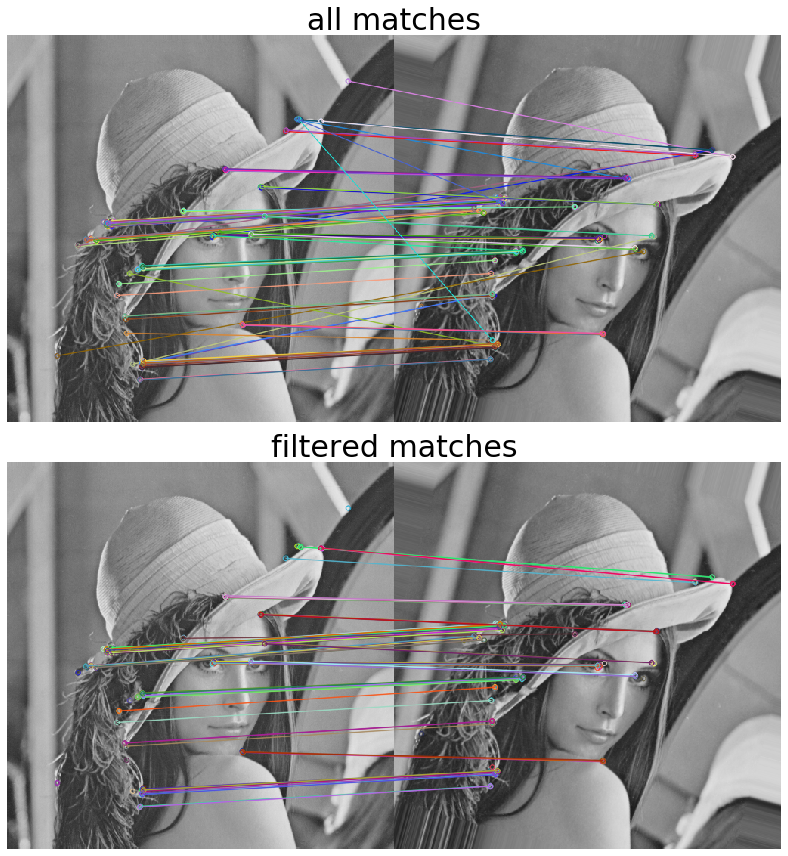

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img0 = cv2.imread('./data/Lena.png', cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread('./data/Lena_rotated.png', cv2.IMREAD_GRAYSCALE)

detector = cv2.ORB_create(100)
kps0, fea0 = detector.detectAndCompute(img0, None)
kps1, fea1 = detector.detectAndCompute(img1, None)
matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING, False)
matches = matcher.match(fea0, fea1)

# Fit homography model to keypoint response found and
# get an inlier matching mask.
pts0 = np.float32([kps0[m.queryIdx].pt for m in matches]).reshape(-1,2)
pts1 = np.float32([kps1[m.trainIdx].pt for m in matches]).reshape(-1,2)
H, mask = cv2.findHomography(pts0, pts1, cv2.RANSAC, 3.0)


plt.figure(figsize=(24,12))
plt.subplot(211)
plt.axis('off')
plt.title('all matches', size=30)
plt.xticks([]), plt.yticks([])
dbg_img = cv2.drawMatches(img0, kps0, img1, kps1, matches, None)
plt.imshow(dbg_img[:,:,[2,1,0]])
plt.subplot(212)
plt.axis('off')
plt.title('filtered matches', size=30)
plt.xticks([]), plt.yticks([])
dbg_img = cv2.drawMatches(img0, kps0, img1, kps1, [m for i,m in enumerate(matches) if mask[i]], None)
plt.imshow(dbg_img[:,:,[2,1,0]])
plt.tight_layout()
plt.show()

## 9. BoW(Bag-of-Word) model for constructing global image descriptors

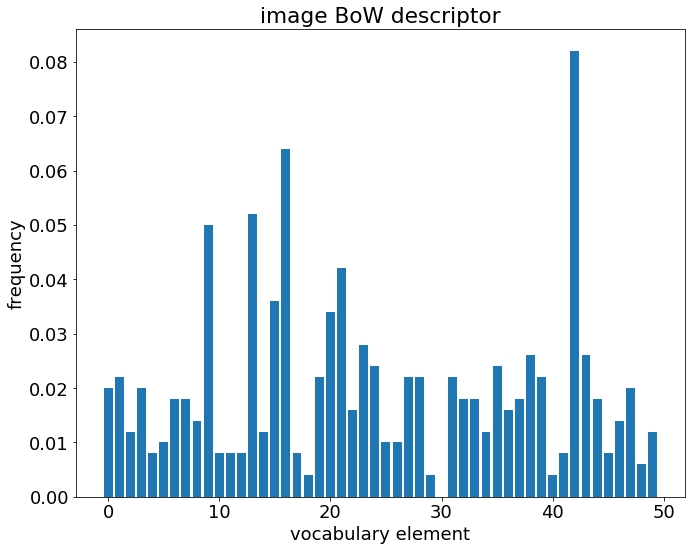

In [9]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('font', size=18)

img0 = cv2.imread('./data/people.jpg', cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread('./data/face.jpeg', cv2.IMREAD_GRAYSCALE)

detector = cv2.ORB_create(500)
_, fea0 = detector.detectAndCompute(img0, None)
_, fea1 = detector.detectAndCompute(img1, None)
descr_type = fea0.dtype

bow_trainer = cv2.BOWKMeansTrainer(50)
bow_trainer.add(np.float32(fea0))
bow_trainer.add(np.float32(fea1))
vocab = bow_trainer.cluster().astype(descr_type)

# Global image BoW descriptor
bow_descr = cv2.BOWImgDescriptorExtractor(detector, cv2.BFMatcher(cv2.NORM_HAMMING))
bow_descr.setVocabulary(vocab)

img = cv2.imread('./data/Lena.png', cv2.IMREAD_GRAYSCALE)
kps = detector.detect(img, None)
descr = bow_descr.compute(img, kps)

plt.figure(figsize=(10,8))
plt.title('image BoW descriptor')
plt.bar(np.arange(len(descr[0])), descr[0])
plt.xlabel('vocabulary element')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()